# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import datetime
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize
import seaborn as sns; sns.set()   # trying a new package called seaborn to generate plots

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Today's time
now = datetime.datetime.now()
todayDate = now.strftime("%m/%d/%Y")

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base URL for open weather API
baseURL = "http://api.openweathermap.org/data/2.5/weather?"

# df is the base dataframe with api responses
# I use a json_normalize() function to flatten and normalize json responses into dataframe
df = pd.DataFrame()
x = 1
print('Beginning Data Retrieval')
print('-' * 38)
for city in cities:
    queryUrl = baseURL + 'appid=' + api_key + '&q=' + city + '&units=imperial'
    try:
        response = requests.get(queryUrl).json()
        if response['cod'] == 200:
            print(f"Processing Record data for {x} of Set 1 | {city}")
            df = df.append(json_normalize(response), sort=True)
            x = x+1
        else:
            x = x-1
            pass
    except Exception as e:
        x = x-1
        pass
        


Beginning Data Retrieval
--------------------------------------
Processing Record data for 1 of Set 1 | iqaluit
Processing Record data for 2 of Set 1 | puerto colombia
Processing Record data for 3 of Set 1 | cabo san lucas
Processing Record data for 4 of Set 1 | lubumbashi
Processing Record data for 5 of Set 1 | kapaa
Processing Record data for 6 of Set 1 | georgetown
Processing Record data for 7 of Set 1 | albany
Processing Record data for 7 of Set 1 | vila velha
Processing Record data for 8 of Set 1 | rikitea
Processing Record data for 9 of Set 1 | aras
Processing Record data for 10 of Set 1 | huilong
Processing Record data for 11 of Set 1 | smithers
Processing Record data for 11 of Set 1 | bredasdorp
Processing Record data for 12 of Set 1 | drumheller
Processing Record data for 11 of Set 1 | busselton
Processing Record data for 12 of Set 1 | upernavik
Processing Record data for 13 of Set 1 | thompson
Processing Record data for 14 of Set 1 | taybad
Processing Record data for 15 of Se

Processing Record data for 143 of Set 1 | meulaboh
Processing Record data for 144 of Set 1 | saint-augustin
Processing Record data for 145 of Set 1 | nizhniy kuranakh
Processing Record data for 146 of Set 1 | north platte
Processing Record data for 147 of Set 1 | puerto ayora
Processing Record data for 148 of Set 1 | severo-kurilsk
Processing Record data for 149 of Set 1 | ostrovnoy
Processing Record data for 150 of Set 1 | husavik
Processing Record data for 151 of Set 1 | kenitra
Processing Record data for 152 of Set 1 | saint-pierre
Processing Record data for 152 of Set 1 | asosa
Processing Record data for 153 of Set 1 | riyadh
Processing Record data for 153 of Set 1 | sao filipe
Processing Record data for 154 of Set 1 | norman wells
Processing Record data for 155 of Set 1 | geraldton
Processing Record data for 156 of Set 1 | nusaybin
Processing Record data for 156 of Set 1 | sorland
Processing Record data for 157 of Set 1 | vao
Processing Record data for 158 of Set 1 | narsaq
Proces

Processing Record data for 285 of Set 1 | weyburn
Processing Record data for 286 of Set 1 | troitskoye
Processing Record data for 287 of Set 1 | salto
Processing Record data for 288 of Set 1 | verkhnyaya maksakovka
Processing Record data for 289 of Set 1 | fortuna
Processing Record data for 290 of Set 1 | bialogard
Processing Record data for 291 of Set 1 | lompoc
Processing Record data for 292 of Set 1 | douentza
Processing Record data for 293 of Set 1 | alofi
Processing Record data for 294 of Set 1 | yulara
Processing Record data for 294 of Set 1 | pascagoula
Processing Record data for 295 of Set 1 | kutum
Processing Record data for 296 of Set 1 | kalmunai
Processing Record data for 297 of Set 1 | half moon bay
Processing Record data for 298 of Set 1 | sipoo
Processing Record data for 298 of Set 1 | muros
Processing Record data for 299 of Set 1 | sobolevo
Processing Record data for 300 of Set 1 | loandjili
Processing Record data for 301 of Set 1 | jiexiu
Processing Record data for 301

Processing Record data for 427 of Set 1 | kaabong
Processing Record data for 428 of Set 1 | haines junction
Processing Record data for 429 of Set 1 | arkhara
Processing Record data for 430 of Set 1 | mabaruma
Processing Record data for 430 of Set 1 | quatre cocos
Processing Record data for 431 of Set 1 | labuhan
Processing Record data for 432 of Set 1 | dhidhdhoo
Processing Record data for 432 of Set 1 | matagami
Processing Record data for 433 of Set 1 | clinton
Processing Record data for 434 of Set 1 | concarneau
Processing Record data for 435 of Set 1 | christchurch
Processing Record data for 436 of Set 1 | berdigestyakh
Processing Record data for 437 of Set 1 | port blair
Processing Record data for 438 of Set 1 | gbarnga
Processing Record data for 439 of Set 1 | baghdad
Processing Record data for 440 of Set 1 | vila do maio
Processing Record data for 441 of Set 1 | beni mazar
Processing Record data for 442 of Set 1 | shakawe
Processing Record data for 443 of Set 1 | acucena
Processi

In [4]:
## check api response data, occasionally, you get humidity reading above 100%
## these are bad data that may skew the plot, so they need to be dropped
df.loc[df['main.humidity'] > 100]

,base,clouds.all,cod,coord.lat,coord.lon,dt,id,main.grnd_level,main.humidity,main.pressure,...,sys.id,sys.message,sys.sunrise,sys.sunset,sys.type,visibility,weather,wind.deg,wind.gust,wind.speed


In [5]:
# show all the column heads of the raw dataframe
list(df)

['base',
 'clouds.all',
 'cod',
 'coord.lat',
 'coord.lon',
 'dt',
 'id',
 'main.grnd_level',
 'main.humidity',
 'main.pressure',
 'main.sea_level',
 'main.temp',
 'main.temp_max',
 'main.temp_min',
 'name',
 'rain.1h',
 'rain.3h',
 'snow.1h',
 'snow.3h',
 'sys.country',
 'sys.id',
 'sys.message',
 'sys.sunrise',
 'sys.sunset',
 'sys.type',
 'visibility',
 'weather',
 'wind.deg',
 'wind.gust',
 'wind.speed']

In [6]:
# take a look at the columns and raw dataset - there are some odd columns and missing values
df.count()

base               539
clouds.all         539
cod                539
coord.lat          539
coord.lon          539
dt                 539
id                 539
main.grnd_level    280
main.humidity      539
main.pressure      539
main.sea_level     280
main.temp          539
main.temp_max      539
main.temp_min      539
name               539
rain.1h             28
rain.3h             34
snow.1h              7
snow.3h              5
sys.country        539
sys.id             259
sys.message        539
sys.sunrise        539
sys.sunset         539
sys.type           259
visibility         231
weather            539
wind.deg           528
wind.gust           35
wind.speed         539
dtype: int64

In [7]:
# drop humidity > 100% rows, check data integrity
df = df.rename(columns={'main.humidity' : 'humidity'})
df = df[df.humidity <= 100]
df.count()

base               539
clouds.all         539
cod                539
coord.lat          539
coord.lon          539
dt                 539
id                 539
main.grnd_level    280
humidity           539
main.pressure      539
main.sea_level     280
main.temp          539
main.temp_max      539
main.temp_min      539
name               539
rain.1h             28
rain.3h             34
snow.1h              7
snow.3h              5
sys.country        539
sys.id             259
sys.message        539
sys.sunrise        539
sys.sunset         539
sys.type           259
visibility         231
weather            539
wind.deg           528
wind.gust           35
wind.speed         539
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# df1 is modified dataframe with relevent data for final reports
df1 = pd.DataFrame()

df1['City'] = df['name']
df1['Cloudiness'] = df['clouds.all']
df1['Country'] = df['sys.country']
df1['Humidity'] = df['humidity']
df1['Date'] = df['dt']
df1['Latitude'] = df['coord.lat']
df1['Longitude'] = df['coord.lon']
df1['Max Temp'] = df['main.temp_max']
df1['Wind Speed'] = df['wind.speed']

# export results to output csv file
df1.to_csv(output_data_file)

# display dataframe
df1.head()

,City,Cloudiness,Country,Humidity,Date,Latitude,Longitude,Max Temp,Wind Speed
0,Iqaluit,90,CA,76,1551732168,63.75,-68.52,-4.01,2.24
0,Puerto Colombia,40,CO,74,1551729600,10.99,-74.96,80.60,16.11
0,Cabo San Lucas,5,MX,47,1551732359,22.89,-109.91,86.00,2.24
0,Lubumbashi,44,CD,66,1551732705,-11.66,27.48,70.78,8.63
0,Kapaa,75,US,56,1551731300,22.08,-159.32,71.60,17.22


In [9]:
# check data integrity - should have same number each columns
df1.count()

City          539
Cloudiness    539
Country       539
Humidity      539
Date          539
Latitude      539
Longitude     539
Max Temp      539
Wind Speed    539
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

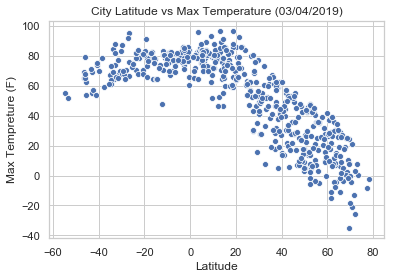

In [10]:
# plotting Lat vs Temp using 
x = df1['Latitude']
y = df1['Max Temp']
tempPlot = sns.set_style("whitegrid")
tempPlot = sns.scatterplot(x, y, data=df1)
tempPlot.set(xlabel='Latitude', ylabel='Max Tempreture (F)')
plt.title(f'City Latitude vs Max Temperature ({todayDate})')
plt.show()

#### Latitude vs. Humidity Plot

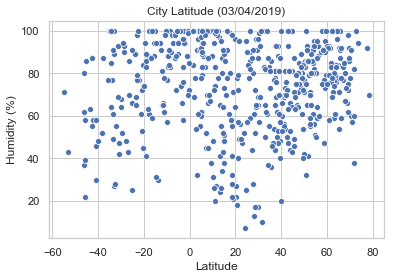

In [11]:
x = df1['Latitude']
y = df1['Humidity']
tempPlot = sns.set_style("whitegrid")

plt.title(f'City Latitude ({todayDate})')
tempPlot = sns.scatterplot(x, y, data=df1,)
tempPlot.set(xlabel='Latitude', ylabel='Humidity (%)')
plt.show()

#### Latitude vs. Cloudiness Plot

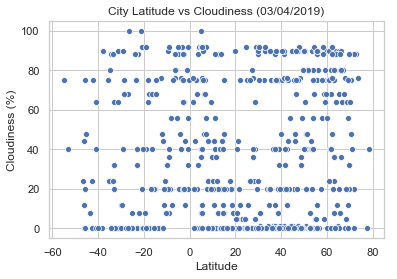

In [13]:
x = df1['Latitude']
y = df1['Cloudiness']
tempPlot = sns.set_style("whitegrid")
tempPlot = sns.scatterplot(x, y, data=df1)
tempPlot.set(xlabel='Latitude', ylabel='Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({todayDate})')
plt.show()

#### Latitude vs. Wind Speed Plot

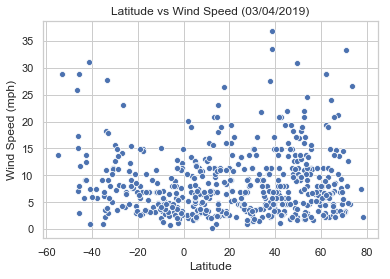

In [14]:
x = df1['Latitude']
y = df1['Wind Speed']
tempPlot = sns.set_style("whitegrid")
tempPlot = sns.scatterplot(x, y, data=df1)
tempPlot.set(xlabel='Latitude', ylabel='Wind Speed (mph)')
plt.title(f'Latitude vs Wind Speed ({todayDate})')
plt.show()